**DATA MINING MTL 782 ASSIGNMENT QUESTION 1**

Q1. Choose a data set from UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=great
er100&numIns=&type=&sort=nameUp&view=list ) ( or any other Source ) for Multi class
classification problems. 

(i) Your first task is characterize the data set. Answer the following
questions about the data: 

1) What the data is about.

The Dry Beans Data Set is a collection of data based on 13,611 images of beans taken with a high resolution camera of seven different types of dry beans. The dataset contains various physical characteristics of the beans such as size, shape, and color. The dataset includes 16 different attributes, such as area, perimeter, compactness, length of kernel, width of kernel, asymmetry coefficient, etc. and one class attribute.

The bean images obtained by computer vision were subjected to feature extraction to obtain a total of 17 attributes. 

The format of the data attributes is as follows: 

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



2) What type of benefit you might hope to get from data mining.

Mining the Dry Beans Data Set can offer several benefits, including:

Improved Understanding of Dry Beans: The data set can help researchers gain a better understanding of the properties and characteristics of dry beans, such as their physical and chemical composition and nutritional value

There is also a wide range of genetic diversity in dry beans which is the most produced one among the edible legume crops in the world. Seed quality is an influential factor in crop production. Therefore, seed classification can help in both marketing and production to provide the principles of sustainable agricultural systems. Using data mining we can obtain a method for obtaining uniform seed varieties from crop produce, so the seeds are not certified as a sole variety.


3) Discuss data quality issues: For each attribute,
a) Are there problems with the data?
b) What might be an appropriate response to the quality issues.

Are there problems with the data?

Unstructured Data : If data is not entered correctly into the system or it is present in different formats for different samples, it can make data mining difficult. However in our data set all samples are structured and present in the same format.

Duplicate Data : duplicate copies of the same data samples can increase data processing time and produce skewed results. The wifi dataset does not contain duplicate samples.

Missing Data : The geometrical data present in the dataset carry no information about the bean colour. Practically, this is a missing insight, since different dry bean species tend to have different colours. However, since we are only using the dataset as a part of an exercise to create machine learning models the absence of certain attributes makes little difference since we are using the classification exercise as a computer training model.

Outliers : Outliers are samples that have attributes that are significantly different from the attributes of other samples in terms of deviation. The wifi data set contains outliers.

Appropriate response to quality issues :

Dealing with outliers : We are not going to remove any outliers since outliers with geometric attributes that have a wide deviation from usual attribute values might represent a class of zero.

We will normalize the geometric attributes using Min-Max scaling so that the values lie in the range between 0 and 1 for efficient performance and accuracy of the various model implementations. 

Since the class attribute is the seven different types of beans, (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira) we are providing a dictionary mapping to convert them into numerical attributes. 


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [73]:
# read text file into pandas DataFrame
import requests, zipfile, io
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
filename = "DryBeanDataset/Dry_Bean_Dataset.xlsx"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
import pandas as pd
df = pd.read_excel(filename)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


**Data Preprocessing**

In [74]:
df.Class[df.Class == 'BARBUNYA'] = 1
df.Class[df.Class == 'BOMBAY'] = 2
df.Class[df.Class == 'CALI'] = 3
df.Class[df.Class == 'DERMASON'] = 4
df.Class[df.Class == 'HOROZ'] = 5
df.Class[df.Class == 'SEKER'] = 6
df.Class[df.Class == 'SIRA'] = 7
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,6
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,6
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,6
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,6
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,6


Number of unique classes

In [75]:
df['Class'].unique()

array([6, 1, 2, 3, 5, 7, 4], dtype=object)

Datatype of attributes and class

In [76]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [77]:
df.describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546.0
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


Checking if any null values are present in the data

In [78]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Count of each class

In [79]:
print(df.groupby("Class").size())

Class
1    1322
2     522
3    1630
4    3546
5    1928
6    2027
7    2636
dtype: int64


Data Standardization : Converting the continuous attributes to invertal attributes by range conversion

In [80]:
data = df.drop('Class', axis=1)         # to prevent standardization of the 'Class' class attribute
data_norm = (data-data.min())/(data.max()-data.min())
data_norm = pd.concat((data_norm, df.Class), 1)         # adding the 'Class' class back
df=data_norm
print("Scaled Dataset Using Pandas")
df.head()

Scaled Dataset Using Pandas


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,6
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979,6
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,6
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,6
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,6


Counting number of outliers in the dataset corresponding to each attribute

In [81]:
def count_outliers(info,column):
 A1 = info[column].quantile(0.25,interpolation='nearest')
 A2 = info[column].quantile(0.5,interpolation='nearest')
 A3 = info[column].quantile(0.75,interpolation='nearest')
 A4 = info[column].quantile(1,interpolation='nearest')
 z = A3 -A1
 global m,n,d
 d=[]
 m = A1-1.5*z
 n = A3+1.5*z
 if info[column].min()>m and info[column].max()<n:
        print("There are no outliers in "+i+" attribute")
 else:
    print("Outliers are present in "+i+" attribute")
 
 p = info[info[column] < m][column].size
 
 q = info[info[column] > n][column].size
 
 d.append(i)
 
 print("Number of outliers are:",p+q)
for i in df.columns[:-1]:
 count_outliers(df,i)

Outliers are present in Area attribute
Number of outliers are: 551
Outliers are present in Perimeter attribute
Number of outliers are: 500
Outliers are present in MajorAxisLength attribute
Number of outliers are: 379
Outliers are present in MinorAxisLength attribute
Number of outliers are: 569
Outliers are present in AspectRation attribute
Number of outliers are: 473
Outliers are present in Eccentricity attribute
Number of outliers are: 843
Outliers are present in ConvexArea attribute
Number of outliers are: 550
Outliers are present in EquivDiameter attribute
Number of outliers are: 526
Outliers are present in Extent attribute
Number of outliers are: 275
Outliers are present in Solidity attribute
Number of outliers are: 778
Outliers are present in roundness attribute
Number of outliers are: 91
Outliers are present in Compactness attribute
Number of outliers are: 107
Outliers are present in ShapeFactor1 attribute
Number of outliers are: 533
There are no outliers in ShapeFactor2 attribut

In [82]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


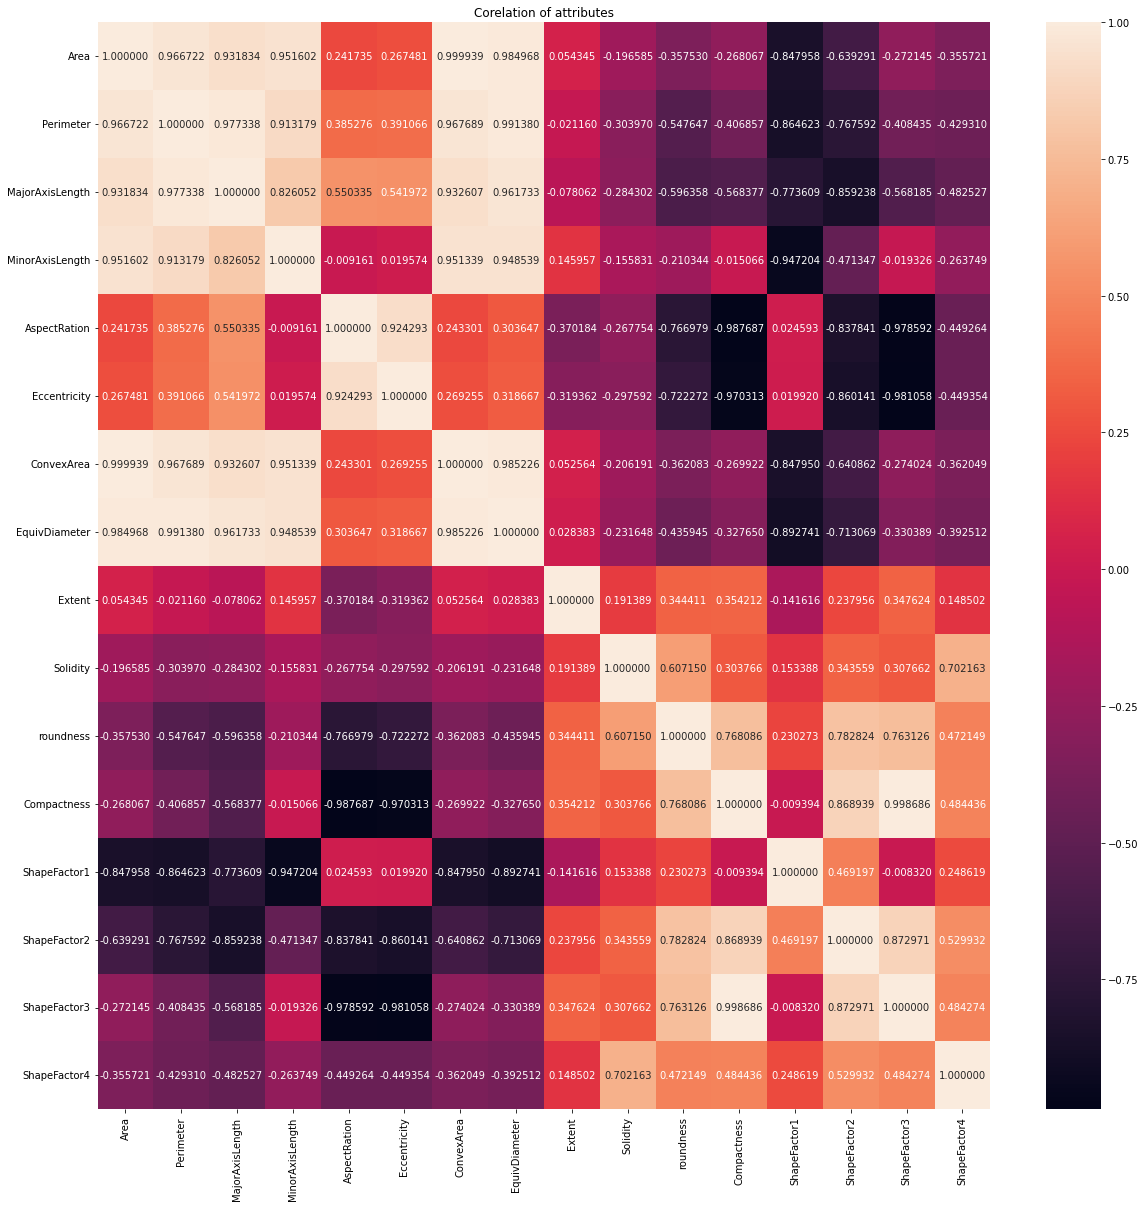

In [83]:
plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Corelation of attributes")
plt.show()

In [84]:
y=df.iloc[:,-1].values
X=df.iloc[:,0:-1].values

In [85]:
y=y.astype('int')

In [86]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,confusion_matrix,classification_report
#Model Select
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing,metrics
from sklearn.pipeline import make_pipeline

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)

**DECISION** **TREE**

In [88]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.893329415221863


APPLYING RANDOMIZED SEARCH FOR HYPERPARAMETER TUNING FOR DECISION TREES

In [91]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)
param_dist = {"max_depth": [3, 5], 
    "max_features": sp_randint(1, 11), 
    "min_samples_split": sp_randint(2, 11), 
    "criterion": ["gini", "entropy"]} 
# build a classifier 
Dt = DecisionTreeClassifier()
# Randomized search
random_search = RandomizedSearchCV(Dt, param_distributions=param_dist, 
    n_iter=20, cv=5) 
random_search.fit(X_train_ss, y_train)
print(random_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'min_samples_split': 2}


APPLYING GRID SEARCH FOR HYPERPARAMETER TUNING FOR DECISION TREES

In [92]:
criterion = ["gini", "entropy"] 
min_samples_leaf_range = [1,2,3] 
max_leaf_nodes_range = [None, 5, 10, 20]
min_sample_split_range = [1,2,5,10] 
max_depth_range = [None, 2, 5] 
par_grid = {"criterion": criterion,
 "min_samples_split": min_sample_split_range,
 "max_depth": max_depth_range,
 "min_samples_leaf": min_samples_leaf_range,
 "max_leaf_nodes": max_leaf_nodes_range
 }
dt= DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt,param_grid=par_grid,cv = 10,scoring='accuracy',refit=True) 
t_model = make_pipeline(preprocessing.StandardScaler(), grid) 
t_model.fit(X_train, y_train) 
print("Tuned model Accuracy: ", grid.best_score_)
print(grid.best_params_)

Tuned model Accuracy:  0.8990010754546678
{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


FROM GRID SEARCH WE GOT THE BEST PARAMETERS NOW WILL USE THEM TO TRAIN OUR MODEL

In [93]:
model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=None, max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 10) 
model_dt.fit(X_train, y_train) 
Y_pred = model_dt.predict(X_test) 
dt_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
dt_acc_score = round(model_dt.score(X_train, y_train) * 100, 2)
print(dt_acc)
print(dt_acc_score)

90.66
97.6


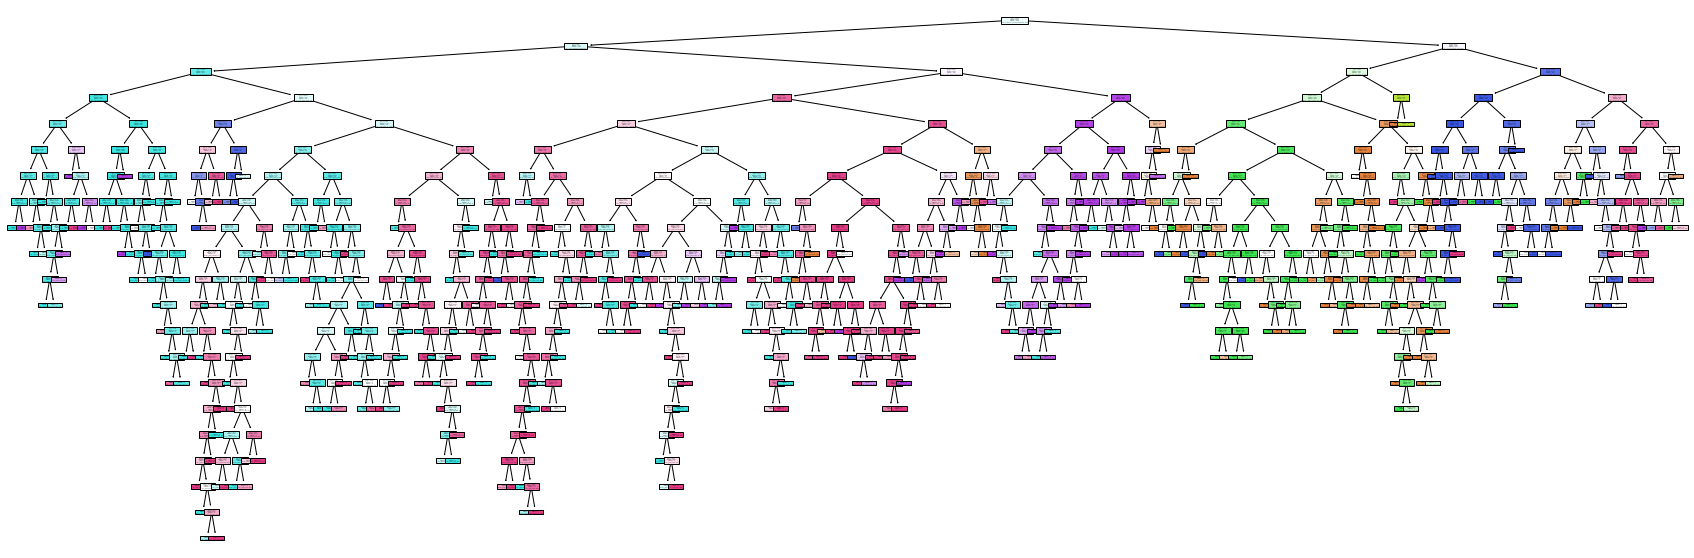

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30,10))
plot_tree(model_dt.fit(X_train, y_train) ,filled=True)
plt.show()

THIS FUNCTION WILL BE USED FOR DOING 5 FOLD VALIDATION ON TRAINING AND TESTING DATA

In [95]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def cross_validation(model, _X, _y, _cv):
      _scoring =  ['accuracy']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
             "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              }

THIS FUNCTION WILL PLOT THE ACCURACY WE WILL GET IN DIFFERENT FOLDS WHILE DOING 5 FOLD VALIDATION

In [96]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

CALLING THE FUNCTION FOR 5 FOLD VALIDATION AND PRINTING MEAN ACCURACIES

In [97]:
decision_tree_result = cross_validation(model_dt,X,y,5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.98925422, 0.97327578, 0.97401047, 0.97685738, 0.98778584]), 'Mean Training Accuracy': 98.02367389884256, 'Validation Accuracy scores': array([0.50165259, 0.71858927, 0.86480529, 0.64180749, 0.41660544]), 'Mean Validation Accuracy': 62.86920167091068}


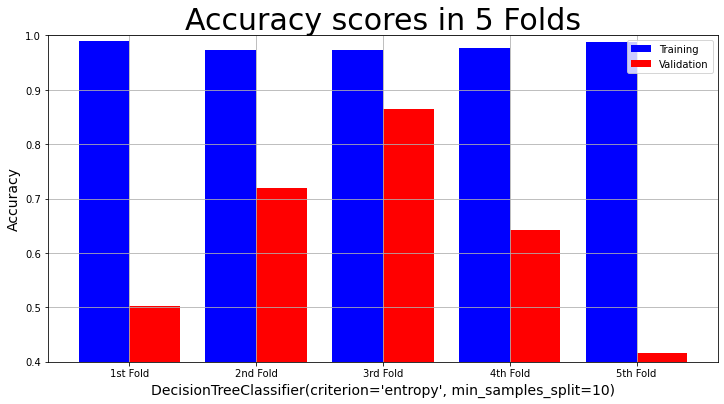

In [98]:
model_name = "Decision Tree"
plot_result(model_dt,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])


In [99]:
k_fold_decisionTree_acc = decision_tree_result["Mean Validation Accuracy"]

CONFUSON MATRIX FOR DECISION TREE MODEL

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for Decision Tree, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for Decision Tree, Classification Report\n',classify)

for Decision Tree, Confusion Matrix:
 [[283   0  20   0   3   9   4]
 [  1 110   0   0   0   0   0]
 [ 26   0 381   0   8   1   3]
 [  0   0   0 826   2  15  62]
 [  1   0  14   4 454   0  18]
 [  2   0   0   8   0 446  14]
 [  2   0   2  81  13   5 585]]
for Decision Tree, Classification Report
 {'1': {'precision': 0.8984126984126984, 'recall': 0.8871473354231975, 'f1-score': 0.8927444794952681, 'support': 319}, '2': {'precision': 1.0, 'recall': 0.990990990990991, 'f1-score': 0.9954751131221719, 'support': 111}, '3': {'precision': 0.9136690647482014, 'recall': 0.9093078758949881, 'f1-score': 0.9114832535885167, 'support': 419}, '4': {'precision': 0.8988030467899891, 'recall': 0.912707182320442, 'f1-score': 0.9057017543859649, 'support': 905}, '5': {'precision': 0.9458333333333333, 'recall': 0.924643584521385, 'f1-score': 0.9351184346035015, 'support': 491}, '6': {'precision': 0.9369747899159664, 'recall': 0.948936170212766, 'f1-score': 0.9429175475687104, 'support': 470}, '7': {'preci

In [101]:
DT_precision =  classify['macro avg']['precision'] 
DT_recall = classify['macro avg']['recall']    
DT_f1 = classify['macro avg']['f1-score']
DT_precision = DT_precision*100
DT_precision = round(DT_precision,3)
DT_recall = DT_recall*100
DT_recall = round(DT_recall,3)
DT_f1 = DT_f1*100
DT_f1 = round(DT_f1,3)

**Random** **Forest**


In [102]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9253599764913312


APPLYING RANDOMIZED SEARCH CV FOR HYPERPARAMETER TUNING IN RANDOM FOREST MODEL

In [103]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)
param_dist = {"max_depth": [3, 5], 
    "max_features": sp_randint(1, 11), 
    "min_samples_split": sp_randint(2, 11), 
    "bootstrap":[True,False],
    "criterion": ["gini", "entropy"]} 
# build a classifier 
Rfc = RandomForestClassifier()
# Randomized search
random_search = RandomizedSearchCV(Rfc, param_distributions=param_dist, 
    n_iter=20, cv=5) 
random_search.fit(X_train_ss, y_train)
print(random_search.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 6}


APPLYING GRID SEARCH ON RANDOM FOREST FOR HYPERPARAMETER TUNING

In [104]:
criteria = ["gini", "entropy"] 
min_sample_split_range = [2,3] 
min_samples_leaf_range = [1,2,3] 
n_estimators = [10]
max_leaf_nodes_range = [None, 5,10] 
param_grid = {
    "n_estimators":n_estimators,
     "criterion": criteria,
    "min_samples_split": min_sample_split_range,
    "min_samples_leaf": min_samples_leaf_range,
    "max_leaf_nodes": max_leaf_nodes_range 
 }
rf = RandomForestClassifier(n_estimators=n_estimators,criterion= criteria, max_leaf_nodes= max_leaf_nodes_range, min_samples_leaf= min_samples_leaf_range, min_samples_split= min_sample_split_range)
grid = GridSearchCV(estimator=rf, 
                     param_grid=param_grid, 
                    cv = 10, 
                     scoring='accuracy',
                    refit=True
) 
t_model = make_pipeline(preprocessing.StandardScaler(), grid) 
t_model.fit(X_train, y_train) 
                            
                            
print("Accuracy of the tuned model: ", grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model:  0.920160934109197
{'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


USING THE BEST PARAMETERS TO TRAIN OUR MODEL OF RANDOM FOREST

In [105]:
rf = RandomForestClassifier(n_estimators=10,criterion= 'gini', max_depth=None, max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 2)
rf.fit(X_train, y_train)
Y_prediction = rf.predict(X_test)
rf_acc=round(accuracy_score(y_test,Y_prediction)* 100, 2)
random_forest_acc_score = round(rf.score(X_train, y_train) * 100, 2)
print(rf_acc)
print(random_forest_acc_score)

91.89
99.53


USING THE PREDEFINED 5 FOLD CROSS VALIDATION FUNCTION TO CALCULATE THE ACCURACIES

In [106]:
Random_Forest_result = cross_validation(rf,X,y,5)
print(Random_Forest_result)

{'Training Accuracy scores': array([0.99788758, 0.99265314, 0.993847  , 0.99494903, 0.99752043]), 'Mean Training Accuracy': 99.53714370021612, 'Validation Accuracy scores': array([0.40727139, 0.75459221, 0.76083762, 0.66972814, 0.30969875]), 'Mean Validation Accuracy': 58.04256229690047}


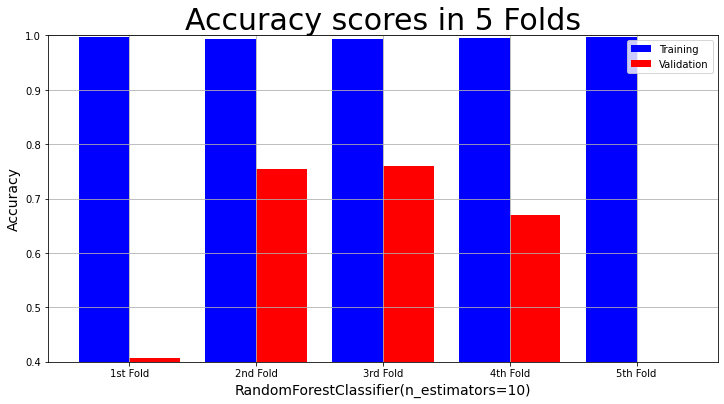

In [107]:
model_name = "Random Forest"
plot_result(rf,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Random_Forest_result["Training Accuracy scores"],
            Random_Forest_result["Validation Accuracy scores"])

In [108]:
k_fold_RF_acc = Random_Forest_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR RANDOM FOREST MODEL

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for Random Forest, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for Random Forest, Classification Report\n',classify)

for Random Forest, Confusion Matrix:
 [[283   0  20   0   3   9   4]
 [  1 110   0   0   0   0   0]
 [ 26   0 381   0   8   1   3]
 [  0   0   0 826   2  15  62]
 [  1   0  14   4 454   0  18]
 [  2   0   0   8   0 446  14]
 [  2   0   2  81  13   5 585]]
for Random Forest, Classification Report
 {'1': {'precision': 0.8984126984126984, 'recall': 0.8871473354231975, 'f1-score': 0.8927444794952681, 'support': 319}, '2': {'precision': 1.0, 'recall': 0.990990990990991, 'f1-score': 0.9954751131221719, 'support': 111}, '3': {'precision': 0.9136690647482014, 'recall': 0.9093078758949881, 'f1-score': 0.9114832535885167, 'support': 419}, '4': {'precision': 0.8988030467899891, 'recall': 0.912707182320442, 'f1-score': 0.9057017543859649, 'support': 905}, '5': {'precision': 0.9458333333333333, 'recall': 0.924643584521385, 'f1-score': 0.9351184346035015, 'support': 491}, '6': {'precision': 0.9369747899159664, 'recall': 0.948936170212766, 'f1-score': 0.9429175475687104, 'support': 470}, '7': {'preci

In [110]:
RF_precision =  classify['macro avg']['precision'] 
RF_recall = classify['macro avg']['recall']    
RF_f1 = classify['macro avg']['f1-score']
RF_precision = RF_precision*100
RF_precision = round(RF_precision,3)
RF_recall = RF_recall*100
RF_recall = round(RF_recall,3)
RF_f1 = RF_f1*100
RF_f1 = round(RF_f1,3)

**KNN**

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

VARYING VALUE OF K IN KNN AND PLOTTING A GRAPH TO REPRESENT ACCURACY SCORES FOR DIFFERENT K

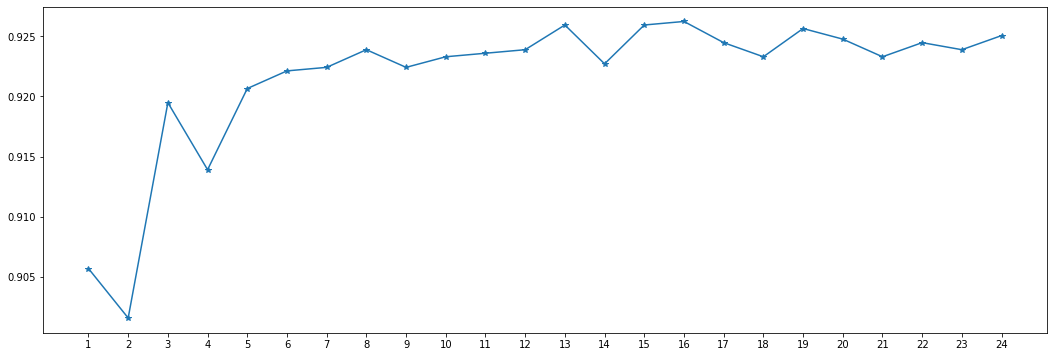

In [114]:
plt.subplots(figsize=(18,6))
n_index=list(range(1,25))
n = pd.Series([],dtype=pd.StringDtype()) 
x=range(1,25)
for i in list(range(1,25)):
 knn_model=KNeighborsClassifier(n_neighbors=i) 
 knn_model.fit(X_train, y_train) 
 pred=knn_model.predict(X_test)
 n=n.append(pd.Series(accuracy_score(y_test,pred)))
plt.plot(n_index, n,marker="*")
plt.xticks(x)
plt.show()

In [115]:
k_range = list(range(1, 51))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [116]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


APPLYING RANDOMIZED SEARCH CV FOR HYPERPARAMETER TUNING IN KNN

In [117]:
knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train, y_train)
rand.cv_results_

{'mean_fit_time': array([0.00248544, 0.00276401, 0.00225677, 0.00190091, 0.00188301,
        0.0018718 , 0.00189531, 0.00189133, 0.00184221, 0.00193882]),
 'std_fit_time': array([2.66054198e-04, 3.82121505e-04, 3.36117236e-04, 1.34364513e-04,
        5.72049050e-05, 7.44963602e-05, 1.03455107e-04, 7.74105732e-05,
        4.41837681e-05, 2.04114238e-04]),
 'mean_score_time': array([0.20102556, 0.26393137, 0.1974638 , 0.08555064, 0.0891834 ,
        0.08747606, 0.0787024 , 0.09718115, 0.07654784, 0.08471208]),
 'std_score_time': array([0.08493213, 0.08410464, 0.13572933, 0.00452362, 0.00408445,
        0.01024196, 0.00754204, 0.00553401, 0.00517702, 0.00288788]),
 'param_n_neighbors': masked_array(data=[43, 30, 7, 20, 29, 18, 3, 44, 4, 22],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 43},
  {'n_neighbors': 30},
  {'n_neighbors': 7},
  {'n_neig

In [118]:
print(rand.best_score_)
print(rand.best_params_)

0.9218259683893144
{'n_neighbors': 20}


APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING IN KNN

In [119]:
grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

THESE ARE THE SCORES WE GOT AS WE VARIED PARAMETERS IN GRID SEARCH CV

In [120]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.84719682 0.8463163  0.86732832 0.87019424 0.87607114 0.87798231
 0.87878978 0.88209655 0.88077367 0.88363953 0.88275734 0.88503503
 0.88349183 0.88591668 0.88547545 0.88753297 0.88745907 0.88885537
 0.88797361 0.88900237 0.88944285 0.88995734 0.88995729 0.89032472
 0.8904714  0.89061835 0.89003065 0.88981033 0.89017755 0.89076546
 0.89054498 0.89127968 0.8912061  0.89157353 0.89091209 0.89142658
 0.89105898 0.89194074 0.89083856 0.89238154 0.89091209 0.89201416
 0.89135283 0.89179379 0.89157331 0.89172026 0.89105893 0.89179358
 0.89142615 0.89142615]


THESE ARE THE BEST PARAMETERS AFTER COMPILING THE RESULTS

In [121]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8923815411704921
{'n_neighbors': 40}
KNeighborsClassifier(n_neighbors=40)


USING THE BEST PARAMETERS TO TRAIN OUR MODEL

In [122]:
knn_model = KNeighborsClassifier(n_neighbors=40)
knn_model.fit(X_train,y_train)
Y_pred = knn_model.predict(X_test)
knn_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
knn_acc_score = round(knn_model.score(X_train, y_train) * 100, 2)
print(knn_acc)
print(knn_acc_score)

92.27
92.21


DOING 5 FOLD VALIDAION TAKING ACCURACY AS A PARAMETER

In [123]:
KNN_result = cross_validation(knn_model,X,y,5)
print(KNN_result)

{'Training Accuracy scores': array([0.95683321, 0.91367435, 0.91128662, 0.91624575, 0.95399027]), 'Mean Training Accuracy': 93.04060397320391, 'Validation Accuracy scores': array([0.7403599 , 0.94526084, 0.96840558, 0.94562821, 0.72152829]), 'Mean Validation Accuracy': 86.42365642985177}


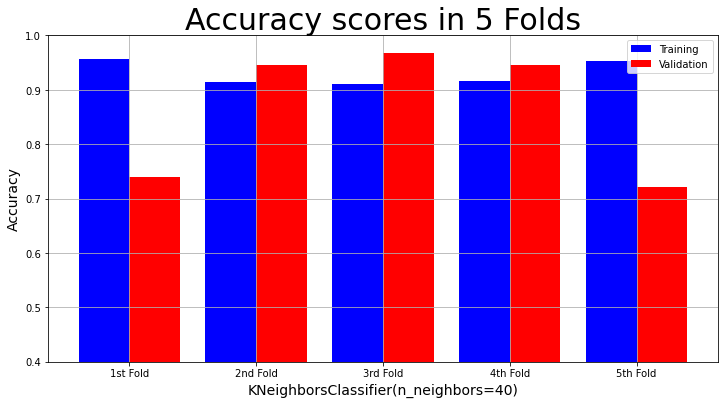

In [124]:
model_name = "KNN"
plot_result(knn_model,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            KNN_result["Training Accuracy scores"],
            KNN_result["Validation Accuracy scores"])

In [125]:
k_fold_KNN_acc =  KNN_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR KNN MODEL

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for KNN, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for KNN, Classification Report\n',classify)

for KNN, Confusion Matrix:
 [[274   0  23   0   1   4  17]
 [  0 111   0   0   0   0   0]
 [  8   0 401   0   4   1   5]
 [  0   0   0 849   1  15  40]
 [  0   0  12   4 464   0  11]
 [  0   0   0   2   0 445  23]
 [  1   0   1  80   4   6 596]]
for KNN, Classification Report
 {'1': {'precision': 0.9681978798586572, 'recall': 0.8589341692789969, 'f1-score': 0.9102990033222592, 'support': 319}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 111}, '3': {'precision': 0.9176201372997712, 'recall': 0.9570405727923628, 'f1-score': 0.9369158878504674, 'support': 419}, '4': {'precision': 0.9080213903743316, 'recall': 0.938121546961326, 'f1-score': 0.9228260869565218, 'support': 905}, '5': {'precision': 0.9789029535864979, 'recall': 0.945010183299389, 'f1-score': 0.9616580310880829, 'support': 491}, '6': {'precision': 0.9447983014861996, 'recall': 0.9468085106382979, 'f1-score': 0.9458023379383634, 'support': 470}, '7': {'precision': 0.861271676300578, 'recall': 0.8662790697

In [127]:
KNN_precision =  classify['macro avg']['precision'] 
KNN_recall = classify['macro avg']['recall']    
KNN_f1 = classify['macro avg']['f1-score']
KNN_precision = KNN_precision*100
KNN_precision = round(KNN_precision,3)
KNN_recall = KNN_recall*100
KNN_recall = round(KNN_recall,3)
KNN_f1 = KNN_f1*100
KNN_f1 = round(KNN_f1,3)

**Naive Bayes**

In [128]:
nb = GaussianNB()
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test) 
nb_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
gaussian_acc_score = round(nb.score(X_train, y_train) * 100, 2)
print(nb_acc)
print(gaussian_acc_score)

90.04
89.7


APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING FOR NAIVE BAYES

In [129]:
var_smoothing=[1e-9,1e-8,1e-7]
par_grid = {"var_smoothing": var_smoothing}
nb=GaussianNB()
grid = GridSearchCV(estimator=nb,param_grid=par_grid,cv = 5,scoring='accuracy',refit=True) 
t_model = make_pipeline(preprocessing.StandardScaler(), grid) 
t_model.fit(X_train, y_train) 
print("Tuned model Accuracy: ", grid.best_score_)
print(grid.best_params_)
print(grid.best_score_)

Tuned model Accuracy:  0.8968459508575668
{'var_smoothing': 1e-09}
0.8968459508575668


USING THE BEST PARAMETERS WE GOT TO TRAIN OUR MODEL

In [130]:
nb = GaussianNB(var_smoothing=1e-9)
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test) 
nb_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
gaussian_acc_score = round(nb.score(X_train, y_train) * 100, 2)
print(nb_acc)
print(gaussian_acc_score)

90.04
89.7


USING THE PREDEFINED FUNCTION TO CALCULATE ACCURACIES ON 5 FOLD VALIDATION

In [131]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [132]:
Naive_Bayes_result = cross_validation(nb,X,y,5)
print(Naive_Bayes_result)

{'Training Accuracy scores': array([0.94011756, 0.88318487, 0.88061346, 0.8784094 , 0.94030673]), 'Mean Training Accuracy': 90.45264049510628, 'Validation Accuracy scores': array([0.72456849, 0.96987509, 0.96767083, 0.9426892 , 0.595518  ]), 'Mean Validation Accuracy': 84.00643226678446}


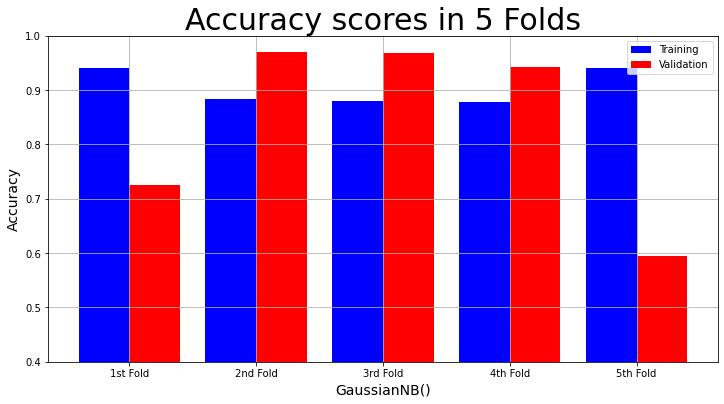

In [133]:
model_name = "Naive Bayes"
plot_result(nb,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Naive_Bayes_result["Training Accuracy scores"],
            Naive_Bayes_result["Validation Accuracy scores"])

In [134]:
k_fold_NB_acc =  Naive_Bayes_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR NAIVE BAYES MODEL

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for Naive Bayes, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for Naive Bayes, Classification Report\n',classify)

for Naive Bayes, Confusion Matrix:
 [[259   0  40   0   2   3  15]
 [  0 111   0   0   0   0   0]
 [ 35   0 377   0   5   1   1]
 [  0   0   0 808   2  19  76]
 [  0   0  10   4 469   0   8]
 [  2   0   0   3   0 442  23]
 [  4   0   1  57  18  10 598]]
for Naive Bayes, Classification Report
 {'1': {'precision': 0.8633333333333333, 'recall': 0.8119122257053292, 'f1-score': 0.8368336025848142, 'support': 319}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 111}, '3': {'precision': 0.8808411214953271, 'recall': 0.8997613365155132, 'f1-score': 0.8902007083825265, 'support': 419}, '4': {'precision': 0.926605504587156, 'recall': 0.8928176795580111, 'f1-score': 0.9093978615644344, 'support': 905}, '5': {'precision': 0.9455645161290323, 'recall': 0.955193482688391, 'f1-score': 0.9503546099290779, 'support': 491}, '6': {'precision': 0.9305263157894736, 'recall': 0.9404255319148936, 'f1-score': 0.9354497354497354, 'support': 470}, '7': {'precision': 0.8294036061026352, 'reca

In [136]:
NB_precision =  classify['macro avg']['precision'] 
NB_recall = classify['macro avg']['recall']    
NB_f1 = classify['macro avg']['f1-score']
NB_precision = NB_precision*100
NB_precision = round(NB_precision,3)
NB_recall = NB_recall*100
NB_recall = round(NB_recall,3)
NB_f1 = NB_f1*100
NB_f1 = round(NB_f1,3)

**SVM**

In [137]:
from sklearn.svm import SVC

In [138]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9274169850132237


In [139]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

APPLYING RANDOMIZED SEARCH CV FOR HYPERPARAMETER TUNING OF SVM CLASSIFIER

In [140]:
SVM_Classifier = RandomizedSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
SVM_Classifier.fit(X_train, y_train)
SVM_Classifier.cv_results_

{'mean_fit_time': array([1.37667611, 4.20732787, 0.6322032 , 1.31318302, 0.64421952,
        0.63830962]),
 'std_fit_time': array([0.35011247, 1.96233089, 0.01109239, 0.27179546, 0.0150227 ,
        0.14437307]),
 'mean_score_time': array([0.33174026, 0.56009724, 0.16113839, 0.31256249, 0.10368733,
        0.14274142]),
 'std_score_time': array([0.0836977 , 0.14441901, 0.00706295, 0.09034157, 0.00170312,
        0.0444178 ]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1, 0.1, 1, 0.1, 1, 0.1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf'

APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING FOR SVM

In [141]:
 grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100], 'gamma': [1, 0.1],
                         'kernel': ['rbf']})

PRINTING THE BEST PARAMETERS

In [142]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


TRAINING OUR MODEL USING THE BEST PARAMETERS WE GOT

In [143]:
svm_model = SVC(kernel = 'rbf', random_state = 0,C=100, gamma=1)
svm_model.fit(X_train, y_train)
Y_pred = svm_model.predict(X_test) 
svm_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
svm_acc_score = round(svm_model.score(X_train, y_train) * 100, 2)

In [144]:
print(svm_acc)
print(svm_acc_score)

93.12
93.43


In [145]:
y_pred = svm_model.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[293   0  16   0   2   3   5]
 [  0 111   0   0   0   0   0]
 [ 10   0 400   0   5   1   3]
 [  1   0   0 849   1  10  44]
 [  1   0  11   3 467   0   9]
 [  1   0   0   5   0 448  16]
 [  1   0   1  77   5   3 601]]


0.9312371436967382

APPLYING 5 FOLD VALIDATION TO OUR SVM MODEL

In [147]:
SVM_result = cross_validation(svm_model,X,y,5)
print(SVM_result)

{'Training Accuracy scores': array([0.96895665, 0.925613  , 0.9230416 , 0.92598035, 0.96712278]), 'Mean Training Accuracy': 94.21428773376715, 'Validation Accuracy scores': array([0.63275799, 0.96362968, 0.97905952, 0.96399706, 0.55620867]), 'Mean Validation Accuracy': 81.91305835424309}


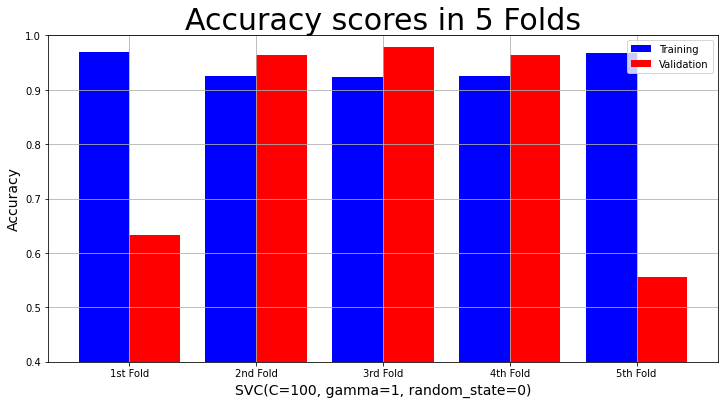

In [148]:
model_name = "SVM"
plot_result(svm_model,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            SVM_result["Training Accuracy scores"],
            SVM_result["Validation Accuracy scores"])

In [149]:
k_fold_SVM_acc = SVM_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR SVM MODEL

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for SVM, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for SVM, Classification Report\n',classify)

for SVM, Confusion Matrix:
 [[293   0  16   0   2   3   5]
 [  0 111   0   0   0   0   0]
 [ 10   0 400   0   5   1   3]
 [  1   0   0 849   1  10  44]
 [  1   0  11   3 467   0   9]
 [  1   0   0   5   0 448  16]
 [  1   0   1  77   5   3 601]]
for SVM, Classification Report
 {'1': {'precision': 0.9543973941368078, 'recall': 0.9184952978056427, 'f1-score': 0.9361022364217253, 'support': 319}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 111}, '3': {'precision': 0.9345794392523364, 'recall': 0.954653937947494, 'f1-score': 0.9445100354191263, 'support': 419}, '4': {'precision': 0.9089935760171306, 'recall': 0.938121546961326, 'f1-score': 0.9233278955954323, 'support': 905}, '5': {'precision': 0.9729166666666667, 'recall': 0.9511201629327902, 'f1-score': 0.9618949536560247, 'support': 491}, '6': {'precision': 0.9634408602150538, 'recall': 0.9531914893617022, 'f1-score': 0.9582887700534761, 'support': 470}, '7': {'precision': 0.8864306784660767, 'recall': 0.873546511

In [151]:
SVM_precision =  classify['macro avg']['precision'] 
SVM_recall = classify['macro avg']['recall']    
SVM_f1 = classify['macro avg']['f1-score']
SVM_precision = SVM_precision*100
SVM_precision = round(SVM_precision,3)
SVM_recall = SVM_recall*100
SVM_recall = round(SVM_recall,3)
SVM_f1 = SVM_f1*100
SVM_f1 = round(SVM_f1,3)

**ANN**

In [152]:
import tensorflow as tf
import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

In [153]:
from tensorflow.python.keras.models import Sequential

CREATE MODEL FUNCTION FOR ANN MODEL GENERATION

In [154]:
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(20, activation='relu'))
    
    model.add(Dense(40, activation='sigmoid'))
    model.add(Dense(60, activation='relu'))

    
    model.add(Dense(8, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model
model = create_model() 

CONVERTING MULTI CLASS OUTPUT TO CATEGORICAL DATA FOR USING IN ANN MODEL

In [155]:
y1 = to_categorical(y_train)
y2 = to_categorical(y_test)

In [156]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = create_model)
parameters = dict(batch_size= [16, 32, 64, 128],
              epochs= [100, 150],
              optimizer= ['adam'])

APPLYING RANDOMIZEDSEARCH CV FOR HYPERPARAMETER TUNING IN ANN MODEL

In [ ]:
ANN_Classifier = RandomizedSearchCV(classifier, parameters, cv=5, scoring='accuracy', n_iter=10, random_state=5)
ANN_Classifier.fit(X_train, y_train,verbose = 0)
ANN_Classifier.cv_results_

In [ ]:
print(ANN_Classifier.best_score_)
print(ANN_Classifier.best_params_)

APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING IN ANN MODEL

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = create_model)
parameters = dict(batch_size= [16, 32, 64, 128],
              epochs= [100, 150],
              optimizer= ['adam'])
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid = grid_search.fit(X_train, y1,verbose=0)

In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 16, 'epochs': 100, 'optimizer': 'adam'}


USING THE BEST PARAMETERS FOR TRAINING OUR ANN MODEL

In [157]:
train=model.fit(X_train, y1, epochs=100, batch_size=16,verbose=0,validation_data=(X_test,y2))

PLOTTING THE LOSS FUNCTION DURING TRAINING OF THE ANN MODEL

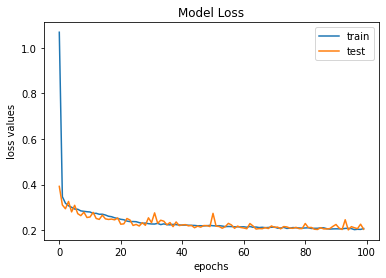

In [158]:
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

PLOTTING ACCURACY FUNCTION DURING TRAINING OF ANN MODEL

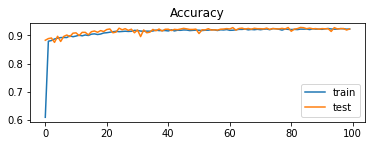

In [159]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(train.history['accuracy'], label='train')
plt.plot(train.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [171]:
train_acc = model.evaluate(X_train,y1, verbose=0)
test_acc = model.evaluate(X_test,y2, verbose=0)
Y_pred = model.predict(X_test)
ANN_train_acc = train_acc[1]*100
ANN_test_acc = test_acc[1]*100

ANN_test_acc = round(ANN_test_acc,3)

CONFUSION MATRIX FOR ANN MODEL

In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score
y3=np.argmax(Y_pred, axis=1)
y4=np.argmax(y2, axis=1)
cm = confusion_matrix(y4, y3)
print('for ANN, Confusion Matrix:\n',cm)
classify=classification_report(y4, y3,output_dict=True)
print('for ANN, Classification Report\n',classify)

for ANN, Confusion Matrix:
 [[281   0  24   0   2   5   7]
 [  0 110   1   0   0   0   0]
 [  6   0 403   0   4   1   5]
 [  0   0   0 838   1  16  50]
 [  0   0  12   2 464   0  13]
 [  2   0   0   3   0 446  19]
 [  1   0   2  70   9   7 599]]
for ANN, Classification Report
 {'1': {'precision': 0.9689655172413794, 'recall': 0.8808777429467085, 'f1-score': 0.922824302134647, 'support': 319}, '2': {'precision': 1.0, 'recall': 0.990990990990991, 'f1-score': 0.9954751131221719, 'support': 111}, '3': {'precision': 0.9117647058823529, 'recall': 0.9618138424821002, 'f1-score': 0.9361207897793263, 'support': 419}, '4': {'precision': 0.9178532311062432, 'recall': 0.9259668508287293, 'f1-score': 0.9218921892189219, 'support': 905}, '5': {'precision': 0.9666666666666667, 'recall': 0.945010183299389, 'f1-score': 0.9557157569515963, 'support': 491}, '6': {'precision': 0.9389473684210526, 'recall': 0.948936170212766, 'f1-score': 0.9439153439153439, 'support': 470}, '7': {'precision': 0.86435786435

In [173]:
ANN_precision =  classify['macro avg']['precision'] 
ANN_recall = classify['macro avg']['recall']    
ANN_f1 = classify['macro avg']['f1-score']
ANN_precision = ANN_precision*100
ANN_precision = round(ANN_precision,3)
ANN_recall = ANN_recall*100
ANN_recall = round(ANN_recall,3)
ANN_f1 = ANN_f1*100
ANN_f1 = round(ANN_f1,3)

**COMPARISION OF MODELS**

BASED ON ACCURACY

In [174]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    'Score': [ knn_acc_score,random_forest_acc_score,gaussian_acc_score,dt_acc_score,svm_acc_score,ANN_train_acc],
    "Acc_score":[knn_acc,rf_acc,nb_acc,dt_acc,svm_acc,ANN_test_acc]
 })
best_df = best.sort_values(by='Acc_score', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,Score,Acc_score
0,SVM,93.430000,93.120
1,ANN,92.603838,92.301
2,KNN,92.210000,92.270
3,Random Forest,99.530000,91.890
4,Decision Tree,97.600000,90.660
5,Naive Bayes,89.700000,90.040


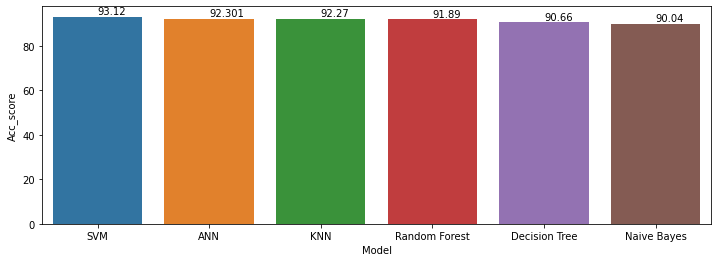

In [175]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="Acc_score",data=best_df)
labels = (best_df["Acc_score"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))

This tells us that based on accuracy : 

BASED ON PRECISION

In [176]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    "Precision":[KNN_precision,RF_precision,NB_precision,DT_precision,SVM_precision,ANN_precision]
 })
best_df = best.sort_values(by='Precision', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,Precision
0,SVM,94.582
1,KNN,93.983
2,ANN,93.837
3,Random Forest,92.092
4,Decision Tree,92.092
5,Naive Bayes,91.090


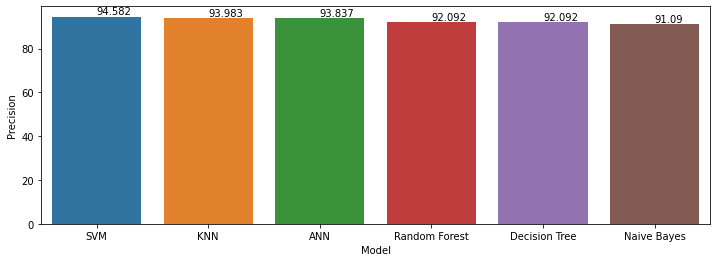

In [177]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="Precision",data=best_df)
labels = (best_df["Precision"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))

BASED ON RECALL

In [178]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    "Recall":[KNN_recall,RF_recall,NB_recall,DT_recall,SVM_recall,ANN_recall]
 })
best_df = best.sort_values(by='Recall', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,Recall
0,SVM,94.130
1,ANN,93.203
2,KNN,93.031
3,Random Forest,91.772
4,Decision Tree,91.772
5,Naive Bayes,90.990


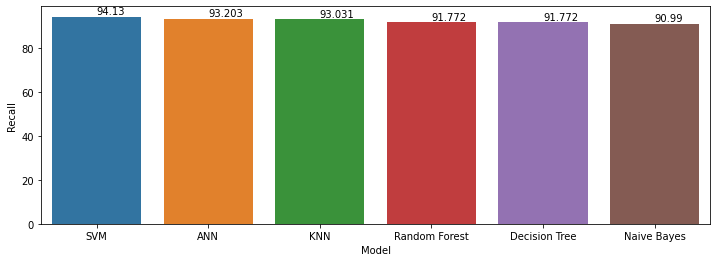

In [179]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="Recall",data=best_df)
labels = (best_df["Recall"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))

BASED ON F1_Score

In [180]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    "F1_Score":[KNN_f1,RF_f1,NB_f1,DT_f1,SVM_f1,ANN_f1]
 })
best_df = best.sort_values(by='F1_Score', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,F1_Score
0,SVM,94.344
1,ANN,93.478
2,KNN,93.447
3,Random Forest,91.928
4,Decision Tree,91.928
5,Naive Bayes,91.015


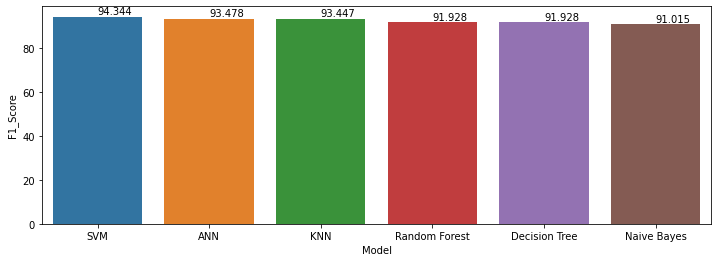

In [181]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="F1_Score",data=best_df)
labels = (best_df["F1_Score"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))